In [1]:
# Acceso a archivos
import sys
import os

# Visualización de métricas
import matplotlib.pyplot as plt

# Librería que divide en test y train el dataset, permite usar un stratified K-Fold, con la finalidad de revisar hiperparámetros
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

In [2]:
sys.path.append(os.path.abspath("../funciones"))

from funcionesEntrenamiento import (
    cargar_datos_entrenamiento,
    cargar_datos_prueba,
    imprimir_forma,
    division_train_val,
    reporte_clasificacion,
    crear_matriz_confusion,
    calcular_roc_auc,
    metricas_tpr_fpr,
    hacer_pepinillo
)

from funcionesEntrenamientoEnsamble import (
    parametros_4_oof,
    predicciones_de_modelos,
    test_ensamble
)

In [3]:
X, y = cargar_datos_entrenamiento()

shape, head = imprimir_forma(X)
print("Shape: ", shape)
head

Shape:  (1500, 1368)


,longitud_texto,num_palabras,comida,restriccion,purga,imagen_corporal,ejercicio,polaridad,subjetividad,tag_Anorexia,...,tfidf_1290,tfidf_1291,tfidf_1292,tfidf_1293,tfidf_1294,tfidf_1295,tfidf_1296,tfidf_1297,tfidf_1298,tfidf_1299
0,0.242191,-0.059671,0,0,0,0,0,1.173738,0.353420,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.549985,-1.624910,0,0,0,0,0,-0.336367,-1.128151,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.456454,-0.283276,3,2,0,0,0,0.796212,0.946048,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333319,0.163935,0,0,0,1,0,1.777780,0.649734,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.790588,-0.730488,0,0,0,1,0,-1.317935,0.946048,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Cargar datos y separar características y columna con las clases con función 
X_test, y_test = cargar_datos_prueba()

shape_test, head_test = imprimir_forma(X_test)
print("Shape test: ", shape_test)
head_test

Shape test:  (250, 1368)


,longitud_texto,num_palabras,comida,restriccion,purga,imagen_corporal,ejercicio,polaridad,subjetividad,tag_Anorexia,...,tfidf_1290,tfidf_1291,tfidf_1292,tfidf_1293,tfidf_1294,tfidf_1295,tfidf_1296,tfidf_1297,tfidf_1298,tfidf_1299
0,-0.395702,-0.506882,0,1,0,0,0,0.972391,1.341134,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.338126,2.399991,0,1,0,1,1,-0.185357,0.538616,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.881716,-0.730488,2,2,0,0,0,-0.336367,-1.128151,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.181439,-0.283276,1,3,0,1,0,-0.336367,-1.128151,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.338126,3.294413,1,3,0,0,0,-0.336367,-1.128151,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train, X_val, y_train, y_val = division_train_val(X, y)

train_shape, _ = imprimir_forma(X_train)
val_shape, _ = imprimir_forma(X_val)
print(f"Forma de conjunto de entrenamiento:", train_shape)
print(f"Forma de conjunto de validación:", val_shape)

Forma de conjunto de entrenamiento: (1200, 1368)
Forma de conjunto de validación: (300, 1368)


In [6]:
skf, oof_preds = parametros_4_oof(X_train)

In [7]:
oof_preds = predicciones_de_modelos(X_train, y_train, skf, oof_preds)

Generando predicciones OOF para el modelo de MLP...
Generando predicciones OOF para el modelo de PAC...


c:\Users\saaso\miniconda3\envs\ia-env\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Generando predicciones OOF para el modelo de RF...
Generando predicciones OOF para el modelo de SVM...
Generando predicciones OOF para el modelo de XGB...


In [8]:
mm_inicial = RandomForestClassifier(random_state=22)
mm_inicial.fit(oof_preds, y_train)

RandomForestClassifier(random_state=22)

In [9]:
X_meta_test = test_ensamble(X_test)

c:\Users\saaso\miniconda3\envs\ia-env\Lib\pickle.py:1760: UserWarning: [01:02:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\data\../common/error_msg.h:82: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  setstate(state)


In [10]:
y_pred_test, y_proba_test, reporte_test = reporte_clasificacion(X_meta_test, y_test, mm_inicial)

print("Classification Report:")
print(reporte_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       116
           1       0.81      0.88      0.84       134

    accuracy                           0.82       250
   macro avg       0.83      0.82      0.82       250
weighted avg       0.83      0.82      0.82       250



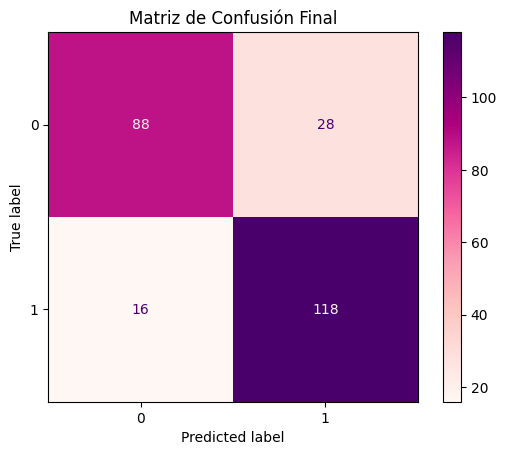

In [11]:
# Matriz de confusión
cm_test, disp_test = crear_matriz_confusion(y_test, y_pred_test)
disp_test.plot(cmap='RdPu')
plt.title("Matriz de Confusión Final")
plt.show()

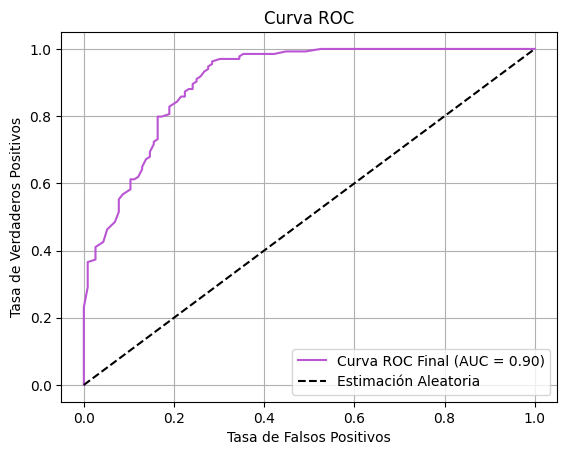

In [12]:
# Predicciones de probabilidad (para curva ROC)
fpr_test, tpr_test, thresholds_test, auc_score_test = calcular_roc_auc(y_test, y_proba_test)

# Gráfica ROC
plt.figure()
plt.plot(fpr_test, tpr_test, color='mediumorchid', label=f"Curva ROC Final (AUC = {auc_score_test:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [13]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_test, FPR_test = metricas_tpr_fpr(cm_test)

# Mostrar métricas
print(f"AUC: {(auc_score_test * 100):.4f}")
print(f"TPR (True Positive Rate): {(TPR_test * 100):.4f}")
print(f"FPR (False Positive Rate): {(FPR_test * 100):.4f}")

AUC: 90.3371
TPR (True Positive Rate): 88.0597
FPR (False Positive Rate): 24.1379


In [14]:
# Modelo base para encontrar mejores parámetros
mm = RandomForestClassifier(random_state=22)

# Parámetros a buscar con GridSearchSV  
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [530, 540, 550, 560, 570],
}
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [3],
    'max_features': ['sqrt'],
    'min_samples_leaf': [5],
    'min_samples_split': [2],
    'n_estimators': [540]
}

# Cross-validation estratificada
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=22
)

# GridSearch
grid_search = GridSearchCV(
    estimator=mm,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=3,
    error_score='raise'
)

In [15]:
grid_search.fit(oof_preds, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             error_score='raise',
             estimator=RandomForestClassifier(random_state=22), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [3],
                         'max_features': ['sqrt'], 'min_samples_leaf': [5],
                         'min_samples_split': [2], 'n_estimators': [540]},
             scoring='roc_auc', verbose=3)

In [16]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 540}

In [17]:
# Creación de modelo con los mejores parámetros
best_mm = RandomForestClassifier(
    criterion = 'entropy',
    max_depth = 3,
    max_features = 'sqrt',
    min_samples_leaf = 5,
    min_samples_split = 2,
    n_estimators = 540,
    random_state = 22
)

best_mm.fit(oof_preds, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       n_estimators=540, random_state=22)

In [18]:
y_pred_test, y_proba_test, reporte_test = reporte_clasificacion(X_meta_test, y_test, best_mm)

print("Classification Report:")
print(reporte_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.82       116
           1       0.81      0.94      0.87       134

    accuracy                           0.85       250
   macro avg       0.86      0.85      0.85       250
weighted avg       0.86      0.85      0.85       250



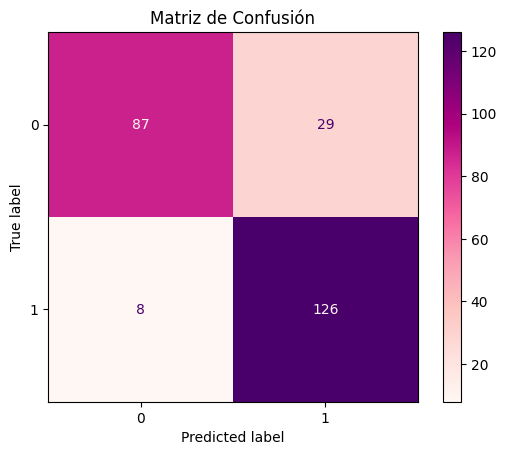

In [19]:
# Matriz de confusión
cm, disp = crear_matriz_confusion(y_test, y_pred_test)
disp.plot(cmap='RdPu')
plt.title("Matriz de Confusión")
plt.show()

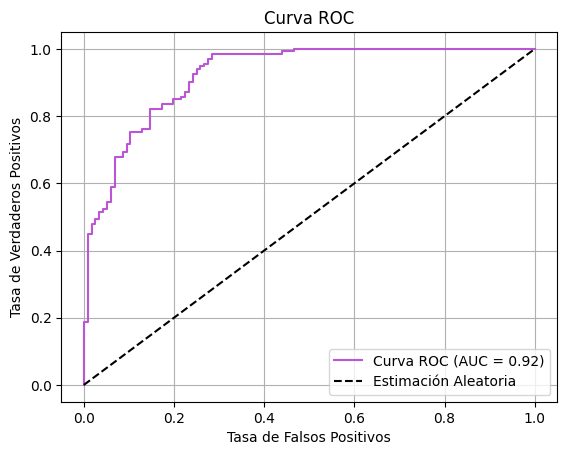

In [20]:
# Predicciones de probabilidad (para curva ROC)
fpr, tpr, thresholds, auc_score = calcular_roc_auc(y_test, y_proba_test)

# Gráfica de ROC
plt.figure()
plt.plot(fpr, tpr, color='mediumorchid', label=f"Curva ROC (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [21]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR, FPR = metricas_tpr_fpr(cm)

# Mostrar métricas
print(f"AUC: {(auc_score * 100):.4f}")
print(f"TPR (Tasa de Positivos Verdaderos): {(TPR * 100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR * 100):.4f}")

AUC: 92.3121
TPR (Tasa de Positivos Verdaderos): 94.0299
FPR (Tasa de Falsos Positivos): 25.0000


In [22]:
# Guardado del modelo final en un archivo pickle
hacer_pepinillo(best_mm, "metaModelEns.pkl")